In [315]:

import numpy as np 
import pandas as pd
import plotly.express as pt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score , accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [316]:
df = pd.read_csv('basic1.csv')
df

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1
...,...,...,...
9789,271.341817,152.122986,1
9790,374.928092,424.480854,2
9791,496.467434,317.553201,3
9792,484.710737,251.504081,3


In [317]:
x_train , x_test , y_train ,y_test = train_test_split(df.iloc[:,:2].to_numpy(),df['color'] , test_size=0.05 , random_state=42)

In [318]:
fig = pt.scatter(x_train ,x_train[:,0],x_train[:,1])
fig.show()

In [319]:
mode = KMeans(n_clusters= 4 , n_init='warn' , init='random' , algorithm='auto' )
mode.fit(x_train , y_train)

/home/yash/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/yash/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='auto', init='random', n_clusters=4)

In [320]:
label = mode.predict(x_test)

In [321]:
accuracy_score(y_test,label)

0.48775510204081635

In [322]:
r2_score(y_test , label)

0.46539657853810257

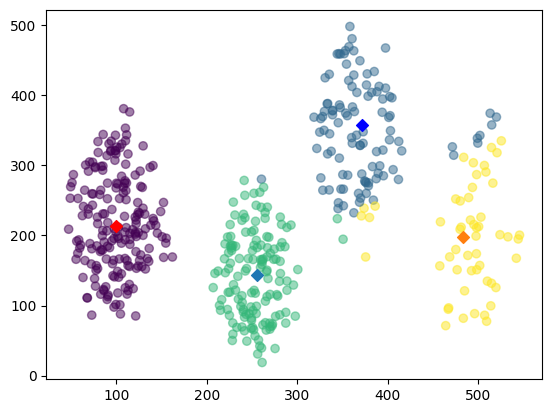

In [323]:
centers = mode.cluster_centers_
plt.scatter(x_test[:,0],x_test[:,1],c=label , alpha=.5)
plt.scatter(centers[0][0] ,centers[0][1] , color='red' , marker='D')
plt.scatter(centers[1][0] ,centers[1][1] , color='blue',marker='D')
plt.scatter(centers[2][0] ,centers[2][1] , marker='D')
plt.scatter(centers[3][0] ,centers[3][1] , marker='D')
